In [16]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [17]:
from tfyolo3.dataloaders import common
from tfyolo3.helpers import draw
from tfyolo3 import YoloV3
from tfyolo3 import layers
from pathlib import Path
import numpy as np
import tensorflow as tf
import math
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt

The classes contained in the dataset

In [18]:
classes = common.load_classes('../tests/data/classes.txt')
# classes.append('car interior')
classes


['book', 'bus', 'car', 'motorcycle', 'vehicle registration plate']

In [19]:
target_shape = (512, 512, 3)
batch_size = 4
# grid_len = 8
is_training = True
max_boxes_per_image = 50
num_classes = len(classes)

In [20]:
model = YoloV3(target_shape,
               max_boxes_per_image,
               # anchors=YoloV3.default_anchors,
               num_classes=num_classes,training=False)

In [21]:
w_path = str(Path('../weights.117-9.932.h5').absolute())
model.load_weights(w_path)

loaded checkopoint from /Users/saccom/PycharmProjects/tfyolo3/notebooks/../weights.117-9.932.h5


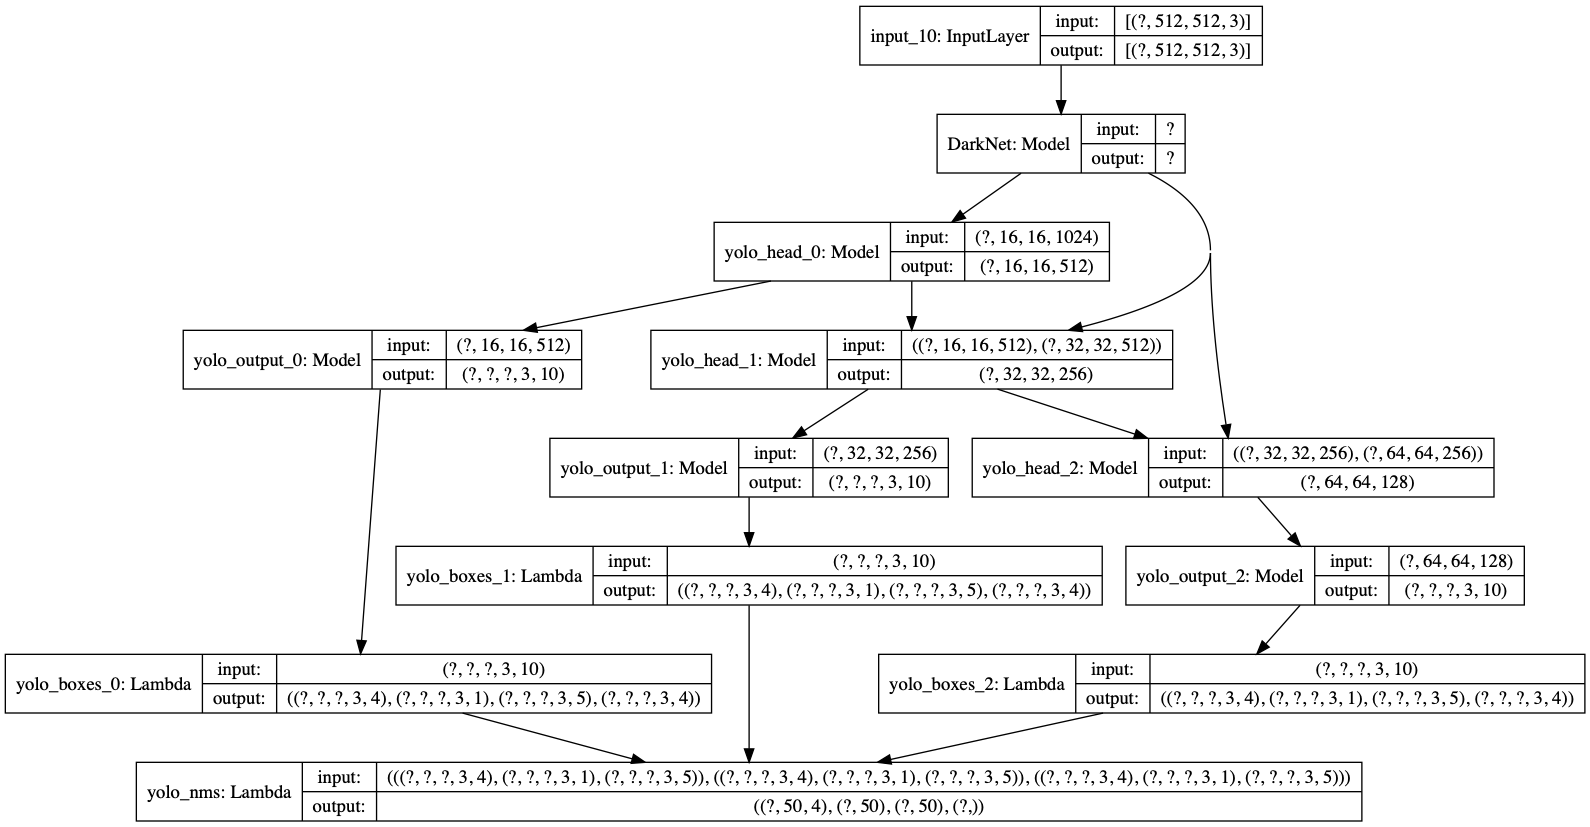

In [22]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

In [23]:
img = common.open_image('./test.jpg')
img_pad = common.pad_to_fixed_size(img, target_shape)
img_resized = common.resize(img, target_shape)
x = np.divide(img_pad, 255.)
x = np.expand_dims(x, 0)
x.shape

(1, 512, 512, 3)

In [24]:
boxes, scores, classes, sel = model.model.predict(x)

In [25]:
boxes[:,:sel[0],:]

array([[[149., 123., 267., 208.],
        [324., 122., 470., 213.],
        [  1.,  80.,  57., 203.],
        [274., 125., 353., 200.],
        [ 60., 104., 117., 169.]]], dtype=float32)

In [26]:
scores

array([[0.9668694 , 0.87802845, 0.73906636, 0.71353406, 0.7121501 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [27]:
classes

array([[2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

In [28]:
sel

array([5], dtype=int32)

In [29]:
class_names = Path('../model_data/coco_classes.txt')\
    .read_text().splitlines()
class_names_dict = dict(enumerate(class_names))

car 0.9668694
car 0.87802845
car 0.73906636
car 0.71353406
car 0.7121501


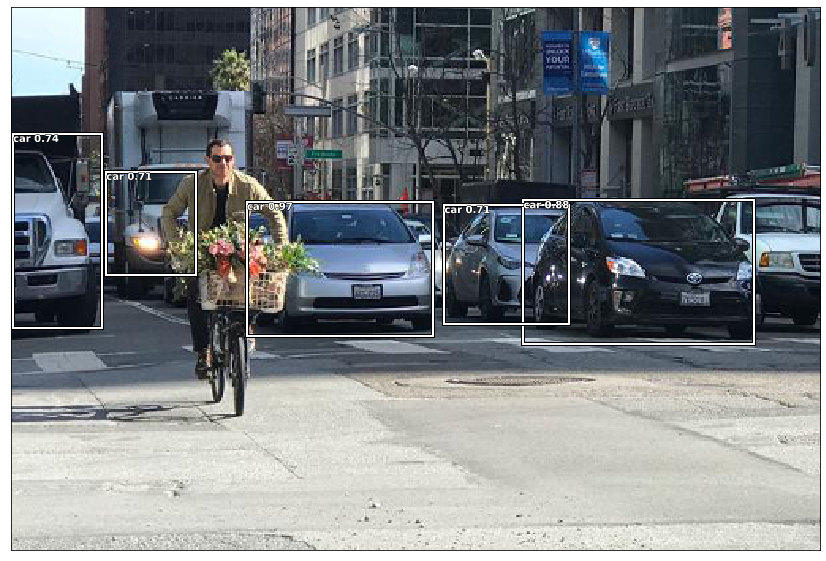

In [30]:
ax = draw.show_img(img_resized, figsize=(16,10))
for i,b in enumerate(boxes[0,:sel[0]]):
    draw.rect(ax, b)
    draw.text(ax, b[:2], class_names_dict[classes[0, i]] + ' ' + str(round(scores[0,i],2)), sz=10)
    print(class_names_dict[classes[0, i]], scores[0,i])
    
plt.show()